<a href="https://colab.research.google.com/github/nandhakumar-v-19/Rice-Leaf-Disease-using-CNN/blob/main/Rice_Leaf_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
    <h1><em><strong>Rice Leaf Disease Prediction</strong></em></h1>
</div>

In [1]:
!git clone https://github.com/nandhakumar-v-19/Rice-Leaf-Disease-using-CNN.git

fatal: destination path 'Rice-Leaf-Disease-using-CNN' already exists and is not an empty directory.


In [3]:
# pip install -r /content/Rice-Leaf-Disease-using-CNN/requirements.txt
!pip install tensorflow

# **Exploratory Data Analysis (EDA)**

The dataset used for this project consists of **rice leaf images** categorized into three major disease types:
- **Leaf Blast**
- **Bacterial Blight**
- **Brown Spot**

EDA was conducted to understand the dataset before applying any deep learning model.

#### 🔍 Key Observations:
- The dataset is **clean and well-structured**, containing images of uniform format and resolution.  
- The **class distribution** is relatively balanced, ensuring no bias toward a particular disease type.  
- **Sample visualizations** provide clear insights into the texture, color, and pattern variations between healthy and infected leaves.  
- No missing or corrupted files were detected.  
- The data is suitable for further steps like **image preprocessing**, **data augmentation**, and **CNN model training**.

#### ✅ Insights and Readiness:
- The EDA confirms that the dataset provides sufficient variation among classes, enabling effective feature extraction using CNNs.  
- Proper preprocessing steps (resizing, normalization, augmentation) will enhance generalization and model performance.  


In [4]:
# Import the Required Libraries
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# Step 2: Write the main folder name
data_dir = "/content/Rice-Leaf-Disease-using-CNN/RiceLeaf Dataset"     # Folder name in your current Colab path

classes = os.listdir(data_dir)
print("Disease Classes:", classes)

Disease Classes: ['Bacterial leaf blight', 'Brown spot', 'Leaf Smut']


In [8]:
# Step 3: Count the number of images in each disease class
image_counts = {}
for cls in classes:
    path = os.path.join(data_dir, cls)
    image_counts[cls] = len(os.listdir(path))

# Step 4: Print the image counts for each class
print("Image counts per class:", image_counts)

Image counts per class: {'Bacterial leaf blight': 40, 'Brown spot': 40, 'Leaf Smut': 39}


In [9]:
# Step 6: Convert dictionary into a table (DataFrame)
df_counts = pd.DataFrame(list(image_counts.items()), columns=['Disease', 'Image_Count'])

# Step 7: Show the table
print(df_counts)

                 Disease  Image_Count
0  Bacterial leaf blight           40
1             Brown spot           40
2              Leaf Smut           39


In [10]:
df_counts.head()

,Disease,Image_Count
0,Bacterial leaf blight,40
1,Brown spot,40
2,Leaf Smut,39


In [11]:
df_counts.tail()

,Disease,Image_Count
0,Bacterial leaf blight,40
1,Brown spot,40
2,Leaf Smut,39


In [12]:
df_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      3 non-null      object
 1   Image_Count  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [13]:
df_counts.describe()

,Image_Count
count,3.000000
mean,39.666667
std,0.577350
min,39.000000
25%,39.500000
50%,40.000000
75%,40.000000
max,40.000000


In [14]:
df_counts.keys()

Index(['Disease', 'Image_Count'], dtype='object')

In [15]:
# total no.of.dataset category and overall datas present in it
print("📋 Statistical Summary:\n")
print("Total number of classes:", len(df_counts))
print("Total images in dataset:", df_counts['Image_Count'].sum())

print("\nClass-wise Distribution:")
for i, row in df_counts.iterrows():
    print(f" - {row['Disease']}: {row['Image_Count']} images")

📋 Statistical Summary:

Total number of classes: 3
Total images in dataset: 119

Class-wise Distribution:
 - Bacterial leaf blight: 40 images
 - Brown spot: 40 images
 - Leaf Smut: 39 images


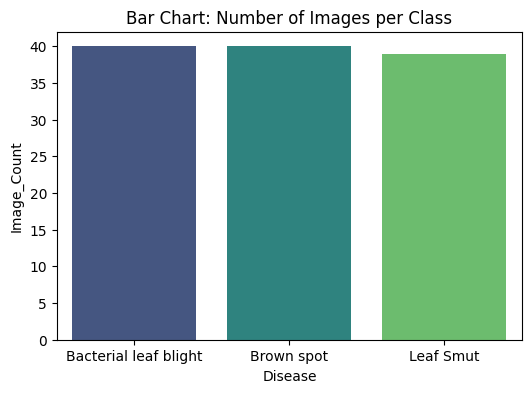

In [16]:
# Bar Chart for Clear numeric comparison
plt.figure(figsize=(6,4))
sns.barplot(x='Disease', y='Image_Count', hue='Disease', data=df_counts, palette='viridis', legend=False)
plt.title('Bar Chart: Number of Images per Class')
plt.show()

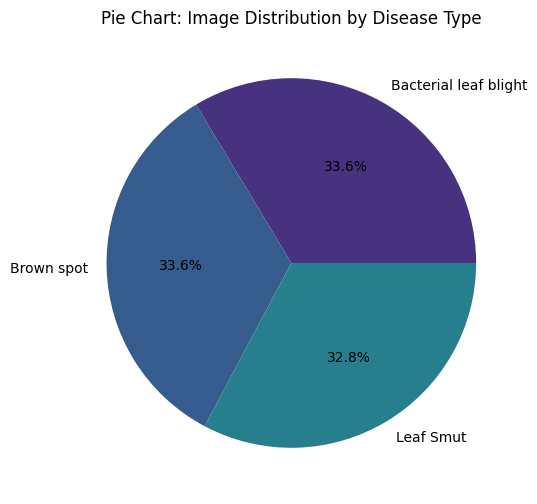

In [17]:
# Pie Chart to Easily spot imbalance
plt.figure(figsize=(6, 6))  # Set the figure size (width, height)
plt.pie(
    df_counts['Image_Count'],               # Values (number of images per disease)
    labels=df_counts['Disease'],            # Labels for each slice
    autopct='%1.1f%%',                      # Display percentage values with 1 decimal point
    colors=sns.color_palette('viridis'),    # Use the same Seaborn color palette for consistency
)
plt.title('Pie Chart: Image Distribution by Disease Type')  # Title of the chart
plt.show()

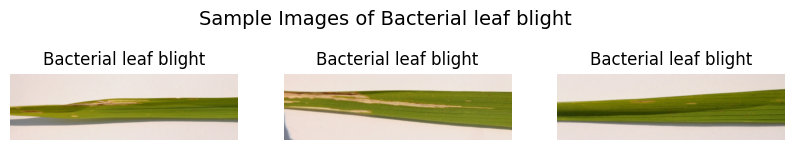

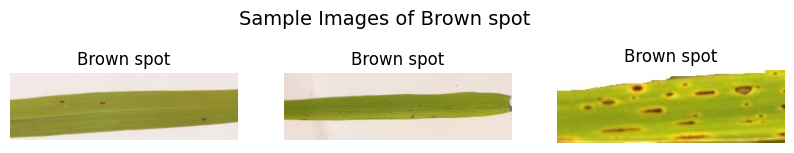

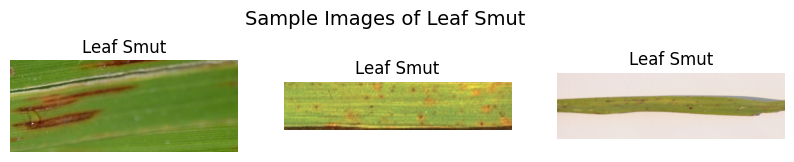

In [18]:
for cls in classes:
    path = os.path.join(data_dir, cls)
    images = os.listdir(path)

    # Select any 3 random images
    sample_imgs = random.sample(images, 3)

    # Create a figure for 3 images
    plt.figure(figsize=(10, 2))

    # Loop to plot 3 images
    for i, img_name in enumerate(sample_imgs):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(cls)

    plt.suptitle(f"Sample Images of {cls}", fontsize=14)
    plt.show()

**Conclusion:** The Exploratory Data Analysis verifies that the Rice Leaf Disease dataset is ready for preprocessing and model development using Convolutional Neural Networks (CNN).

# **Model Preprocessing**

In [25]:
!pip install tensorflow.keras

In [26]:
# install and import the Required Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

In [28]:
datagen = ImageDataGenerator(
    rescale=1./255,        # normalize pixel values (0-1)
    rotation_range=30,     # random rotation
    horizontal_flip=True,  # flip images horizontally
    zoom_range=0.2,        # zoom randomly
    validation_split=0.2   # 80% train, 20% validation
)

In [29]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 96 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


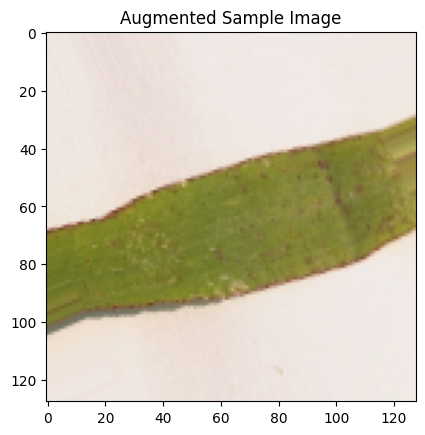

In [30]:
x, y = next(train_data)
plt.imshow(x[0])
plt.title("Augmented Sample Image")
plt.show()

# **CNN Model Setup**

In [38]:
!pip install tensorflow.keras

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [42]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128,128,3)),  # 👈 Define input here
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])


In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)